[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [2]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [3]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210301125746.csv", 
                     encoding="cp949")
df_raw.shape

(450, 27)

In [4]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

일본            45
기타            45
미국            45
유럽연합(EU)      45
중동            45
합계            45
대양주           45
아세안(ASEAN)    45
중남미           45
중국            45
Name: 국가(대륙)별, dtype: int64

In [5]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [6]:
#결럼에 있는 데이터를 행으로 변경 해줌

df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


## 데이터 전처리
### 기간에서 연도를 분리하기

In [7]:
int("2019 4/4 p)".split()[0])

2019

In [8]:
df["연도"] = df["기간"].map(lambda x: x.split()[0])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019
10797,기타,기 타,계,2019 4/4,1094,2019
10798,기타,기 타,면세점,2019 4/4,1,2019


In [9]:
"2019 4/4 p)".split()[1].split("/")[0]

'4'

In [10]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [11]:
df["분기"] = df["기간"].apply(lambda  x : x.split()[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [12]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기 
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df.head()

<ipython-input-12-6639136b242b>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["million"] = df["million"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [13]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & 
        (df["상품군별"] != "합계") ].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [14]:
#info 로 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   million  6048 non-null   float64
 5   연도       9072 non-null   int32  
 6   분기       9072 non-null   int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 496.1+ KB


In [15]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [16]:
# 판매 유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매 유형별 == "계" 데이터만 가져와서 봐야지
# 평균값을 구하는 그래프에서 올바른 값을 표현할 수 있음
df_total = df[df["판매유형별"] == "계"].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


<AxesSubplot:xlabel='연도', ylabel='million'>

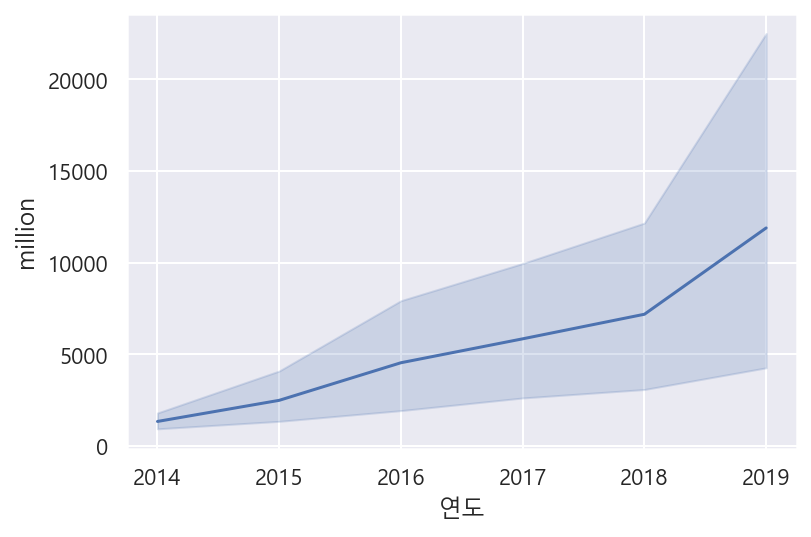

In [17]:
#연도, 판매액 lineplot으로 그리기
sns.lineplot(data = df_total, x="연도", y="million")

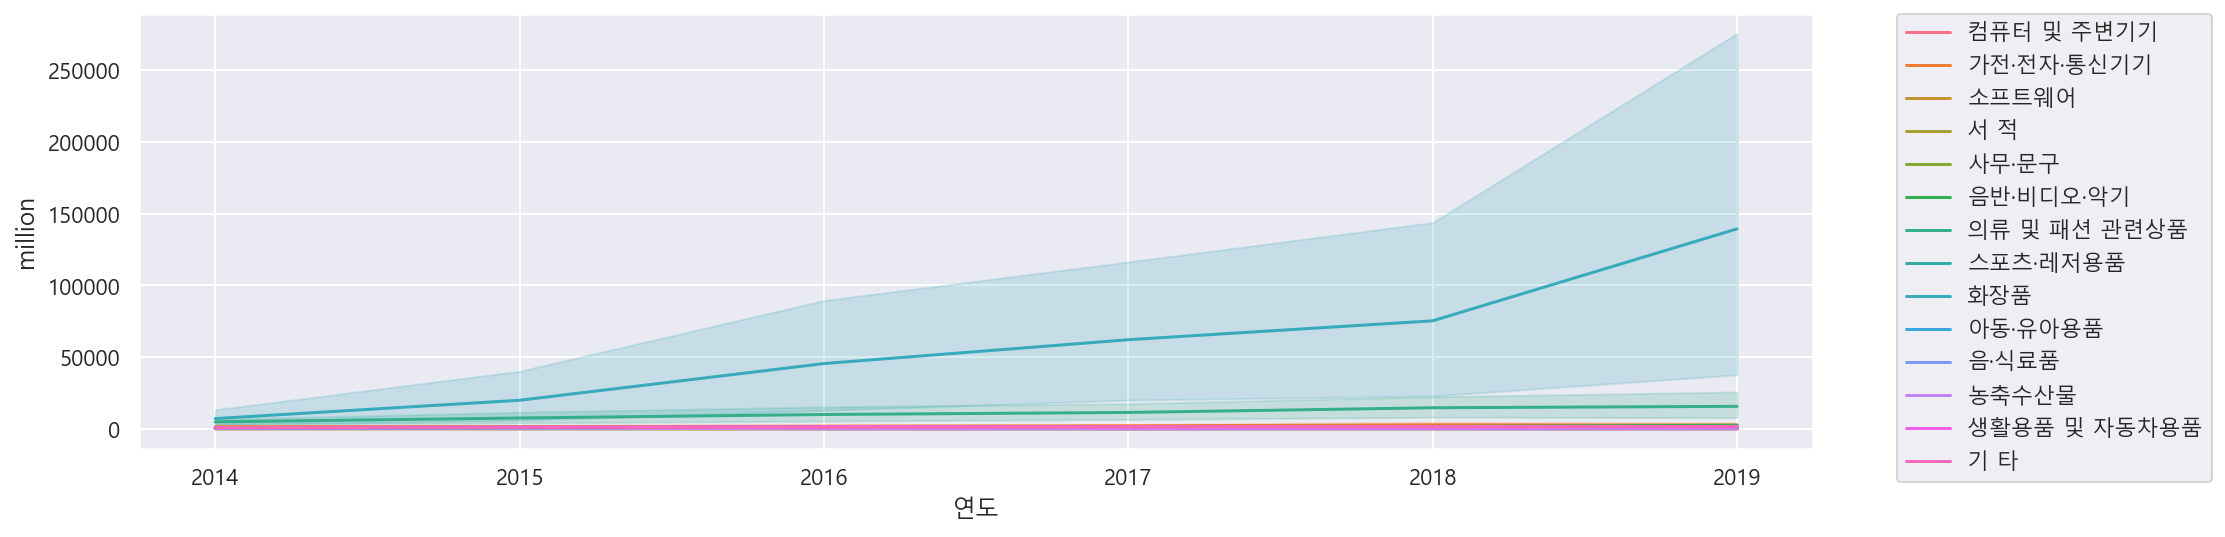

In [19]:
#연도, 판매액 lineplot으로 그리고, 상품군 별로 다른 색상으로 표시
#밖에다가 legend값 표시하고 싶음
plt.figure(figsize=(15, 4))
sns.lineplot(data = df_total, x="연도", y="million", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

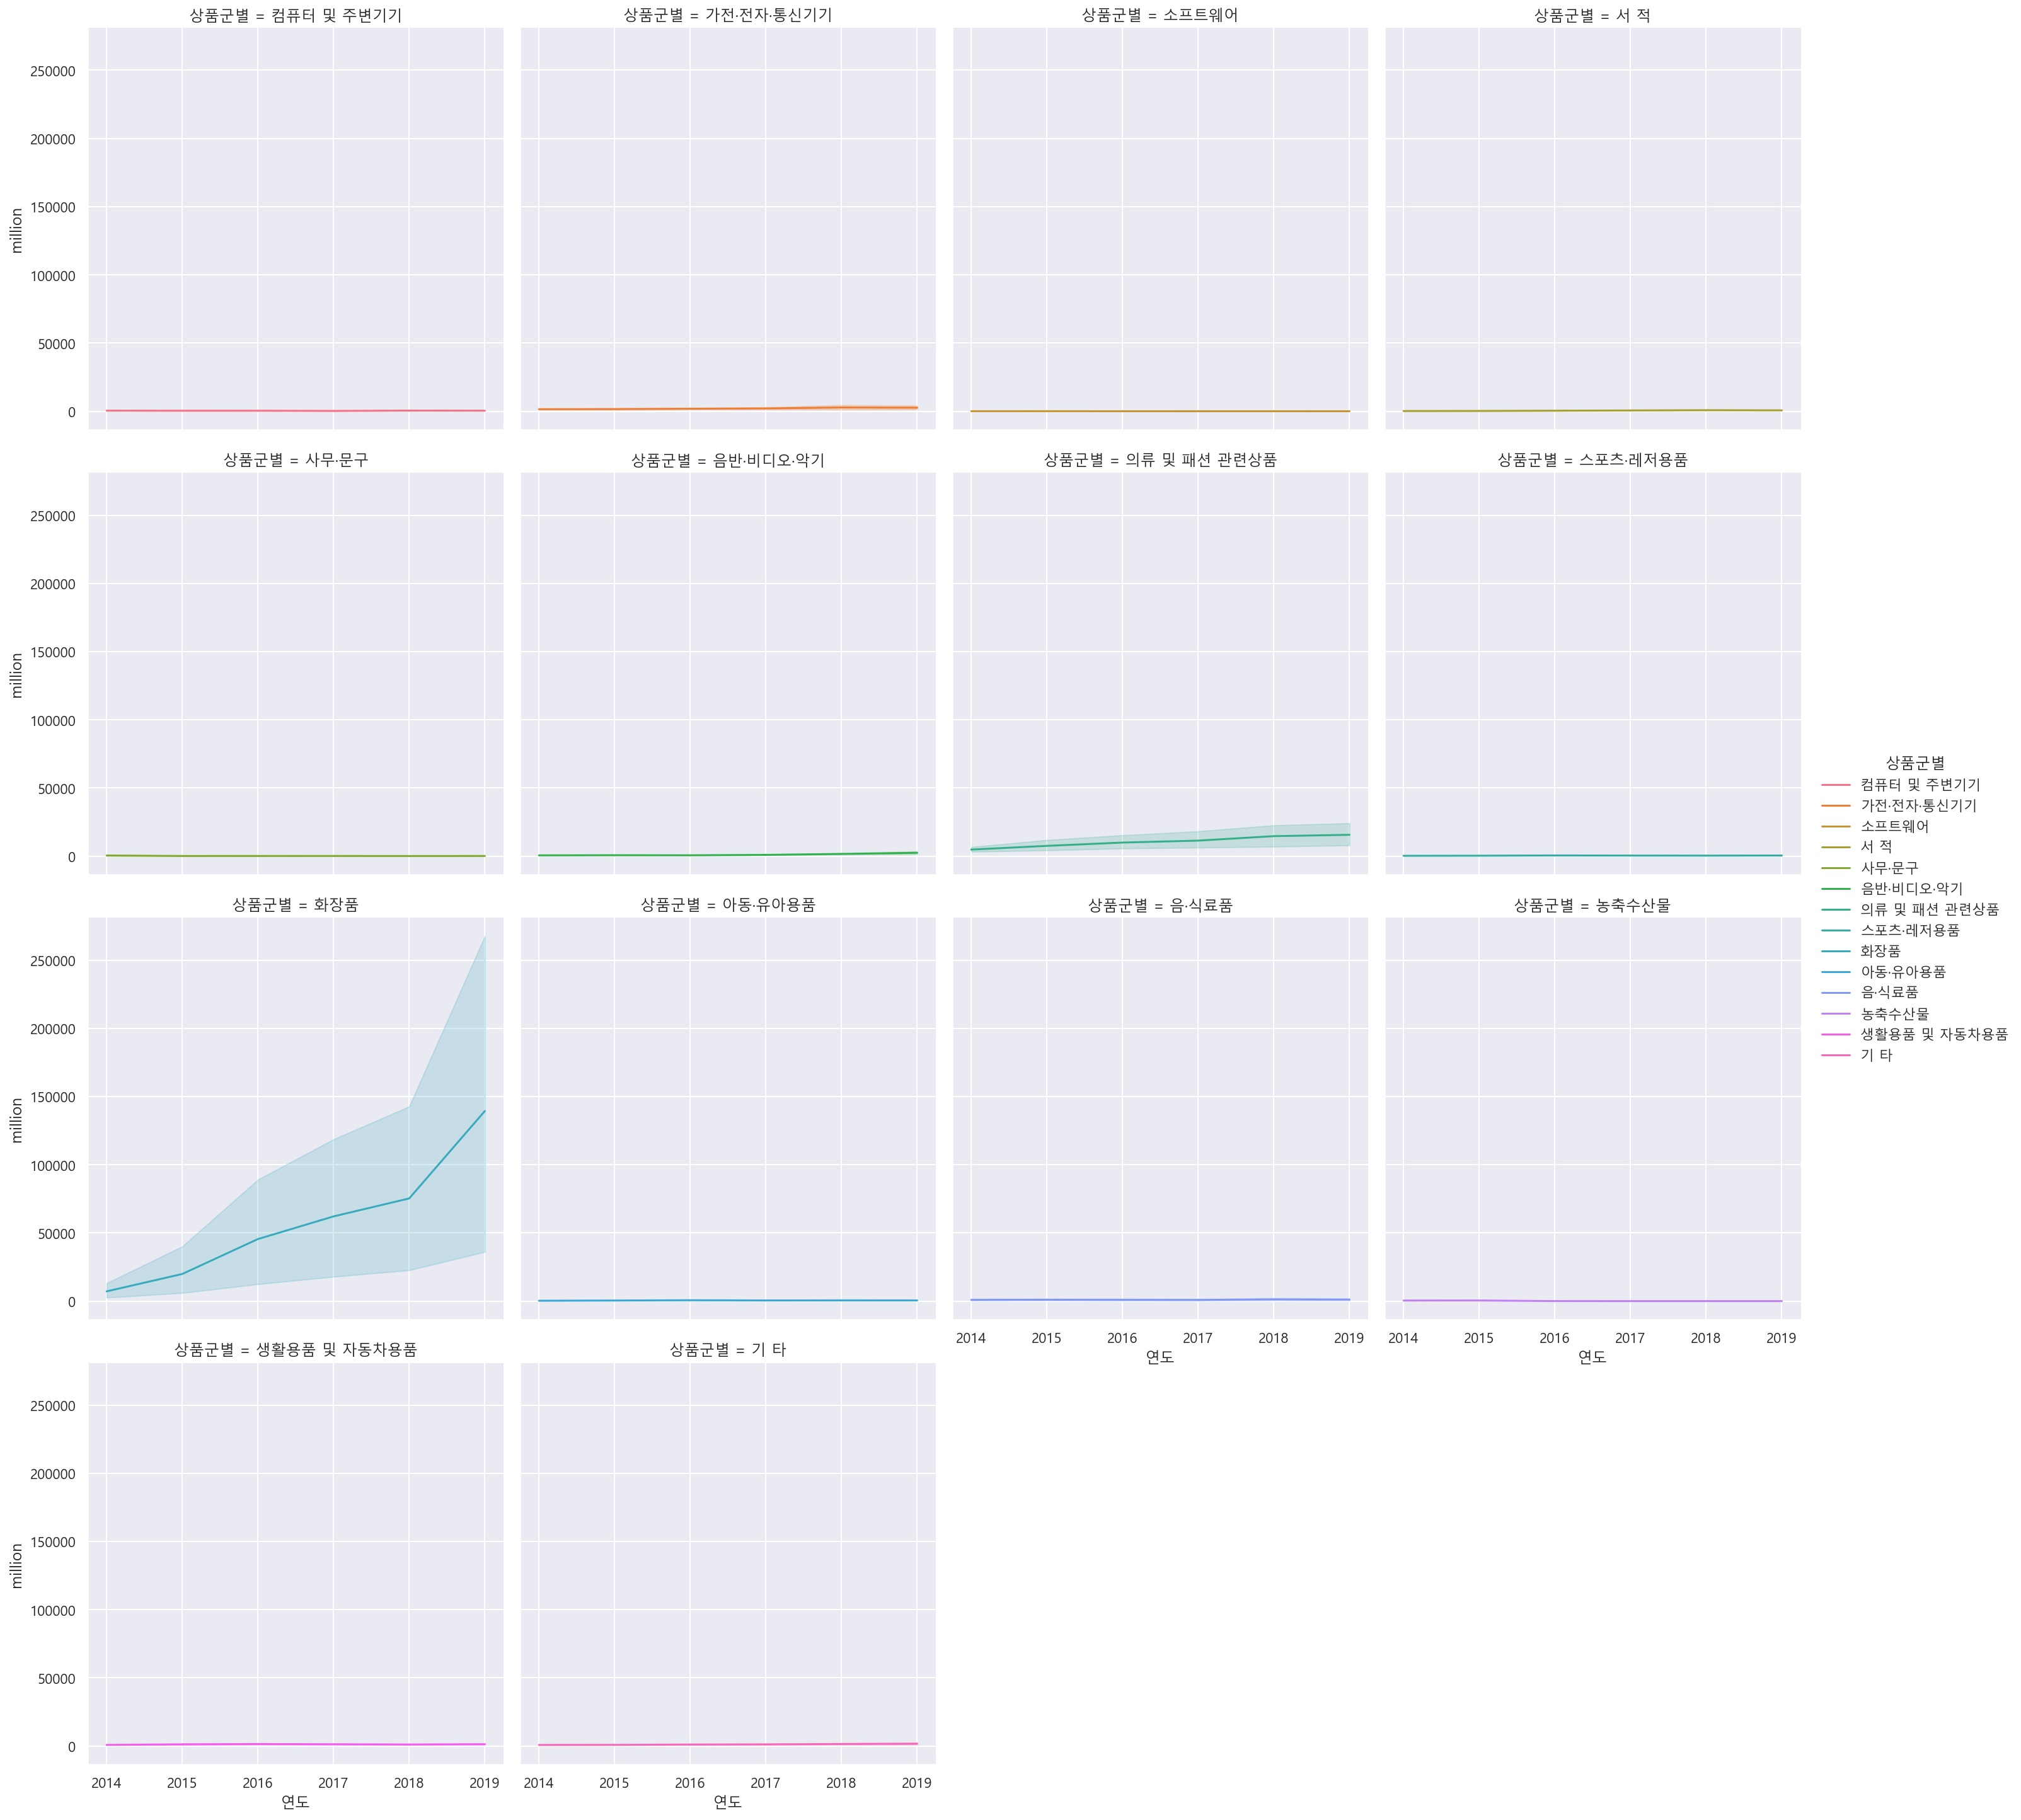

In [20]:
# 위에 그린 그래프를 자세히 보기 위해 서브 플롯으로 표시하기
sns.relplot(x="연도", y="million", data=df_total, hue="상품군별",
            col="상품군별", col_wrap=4, kind="line")

In [23]:
#isin을 사용해 화장품과 의류및 패션관련상품 제외하고 df_sub라는 변수에 담음

df_sub =  df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션관련 상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


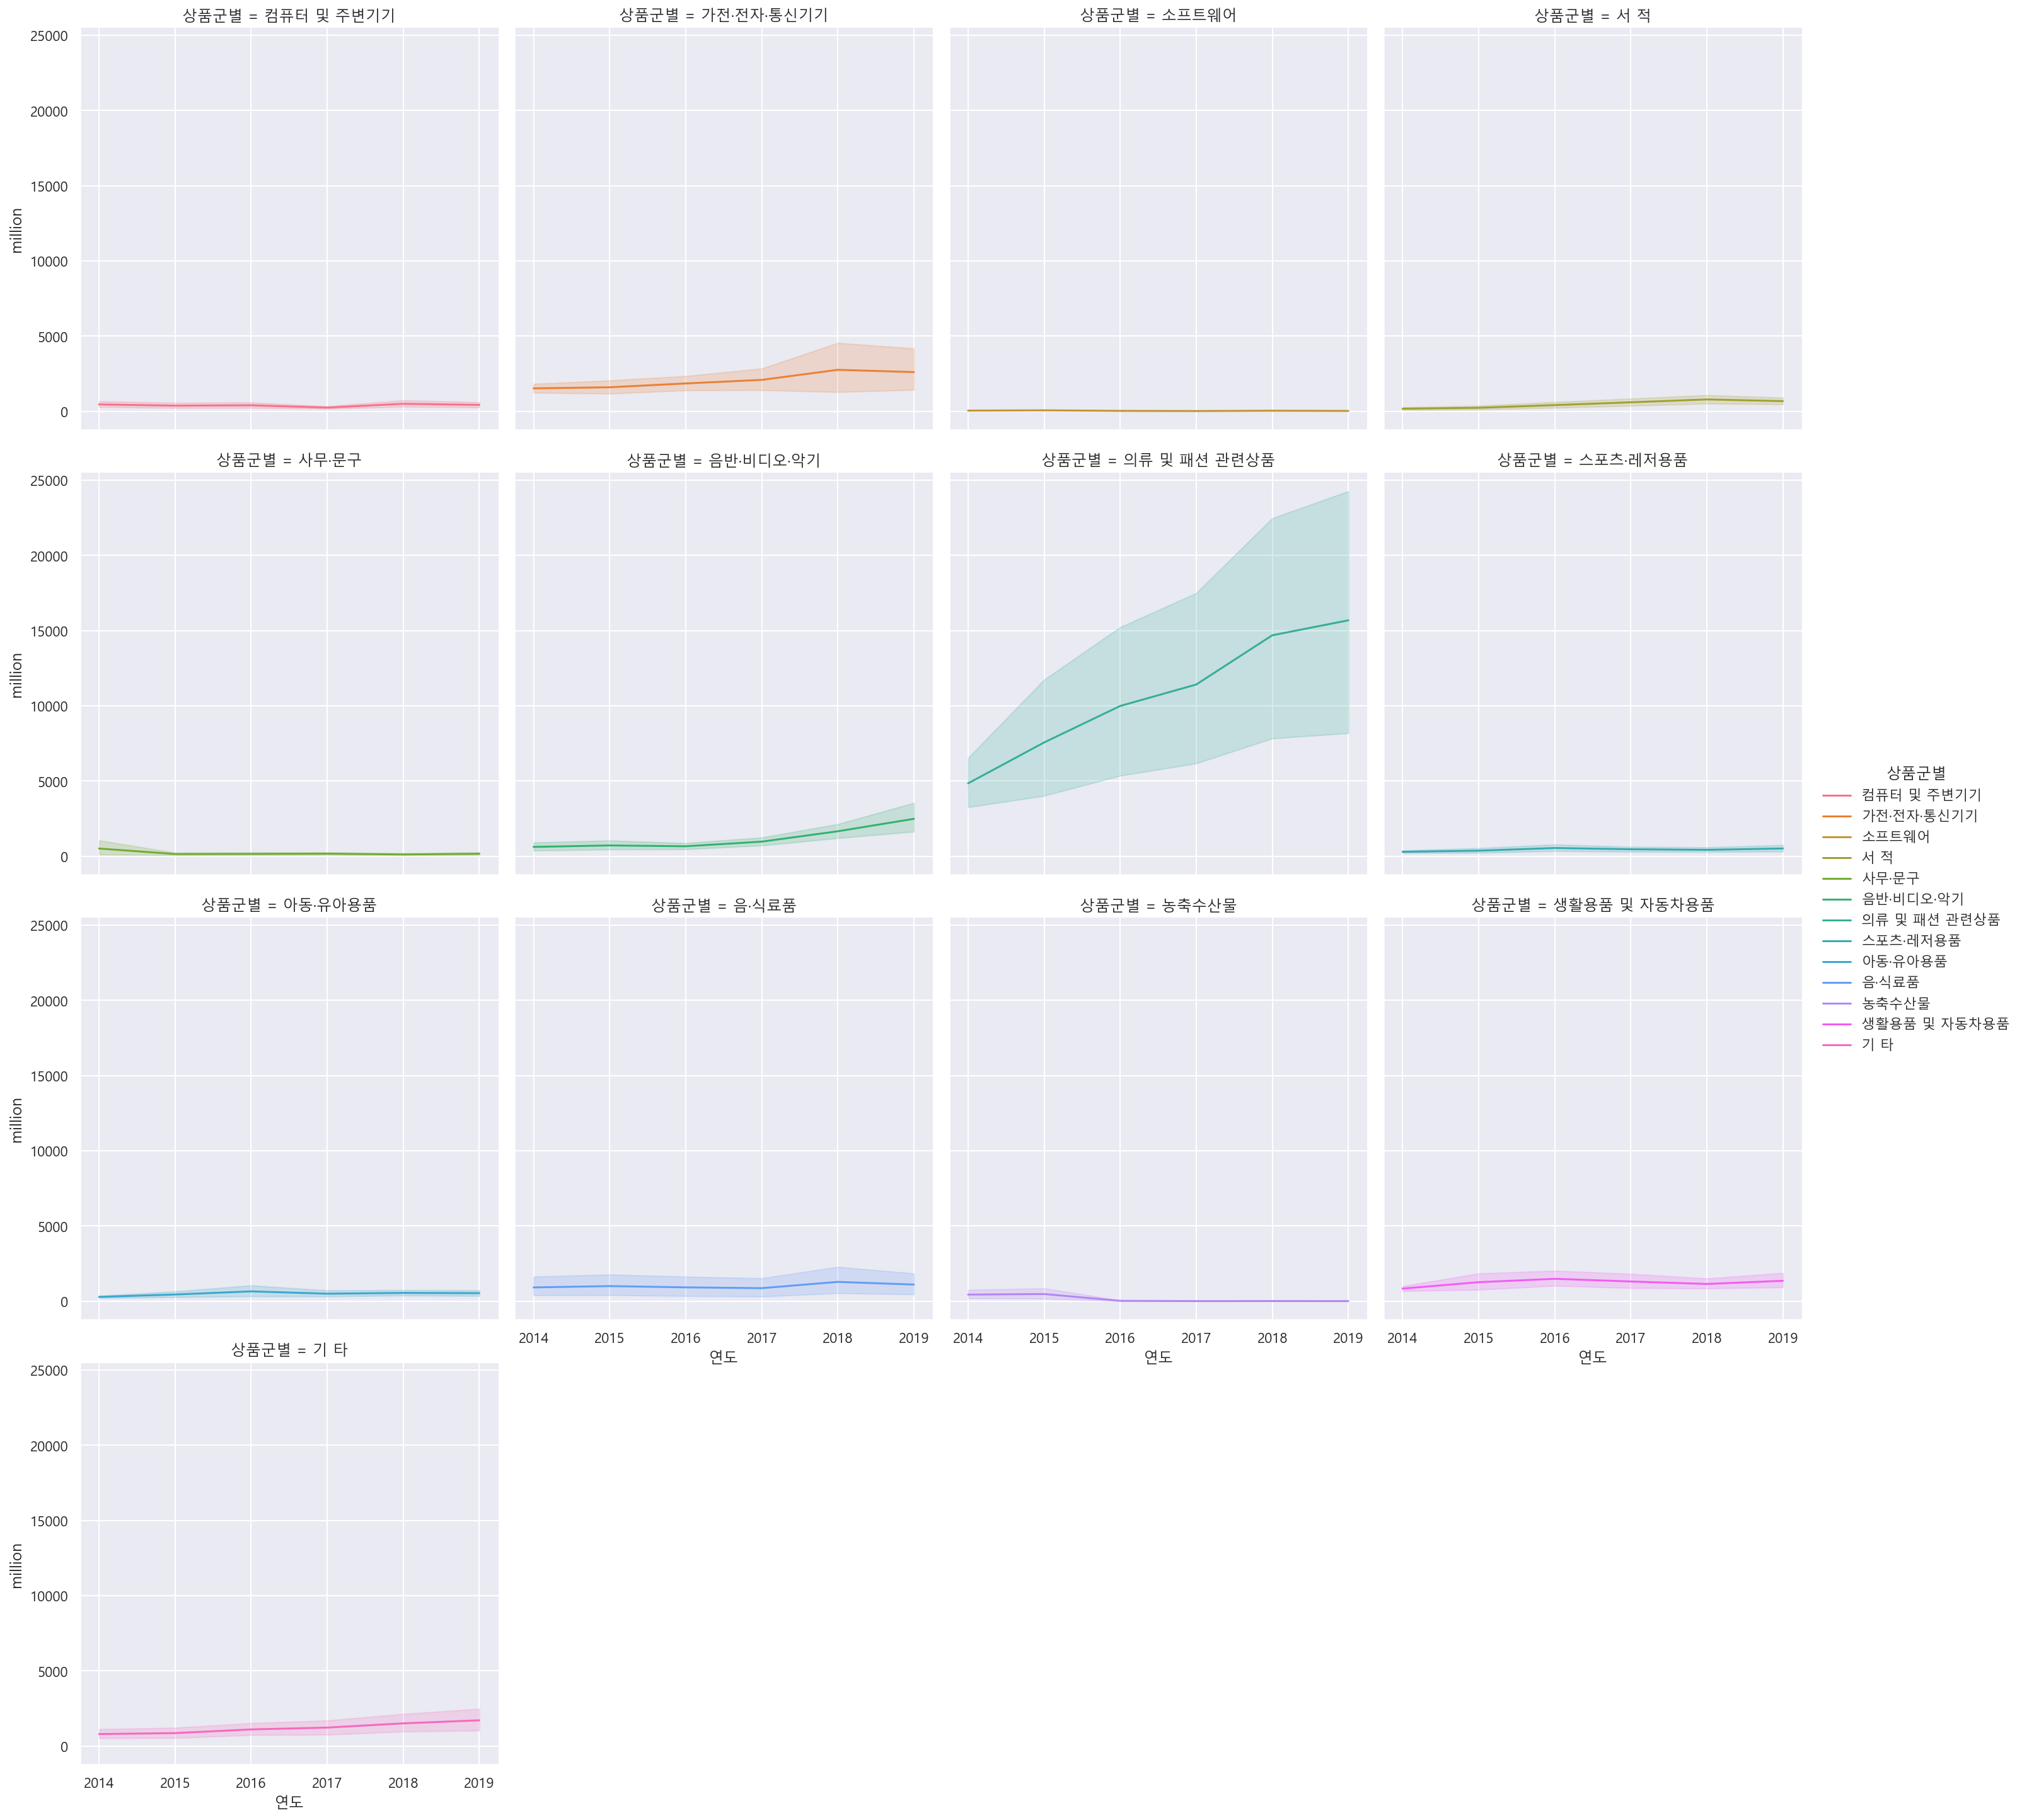

In [24]:
# 위에 그린 그래프를 자세히 보기 위해 서브 플롯으로 표시하기
sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

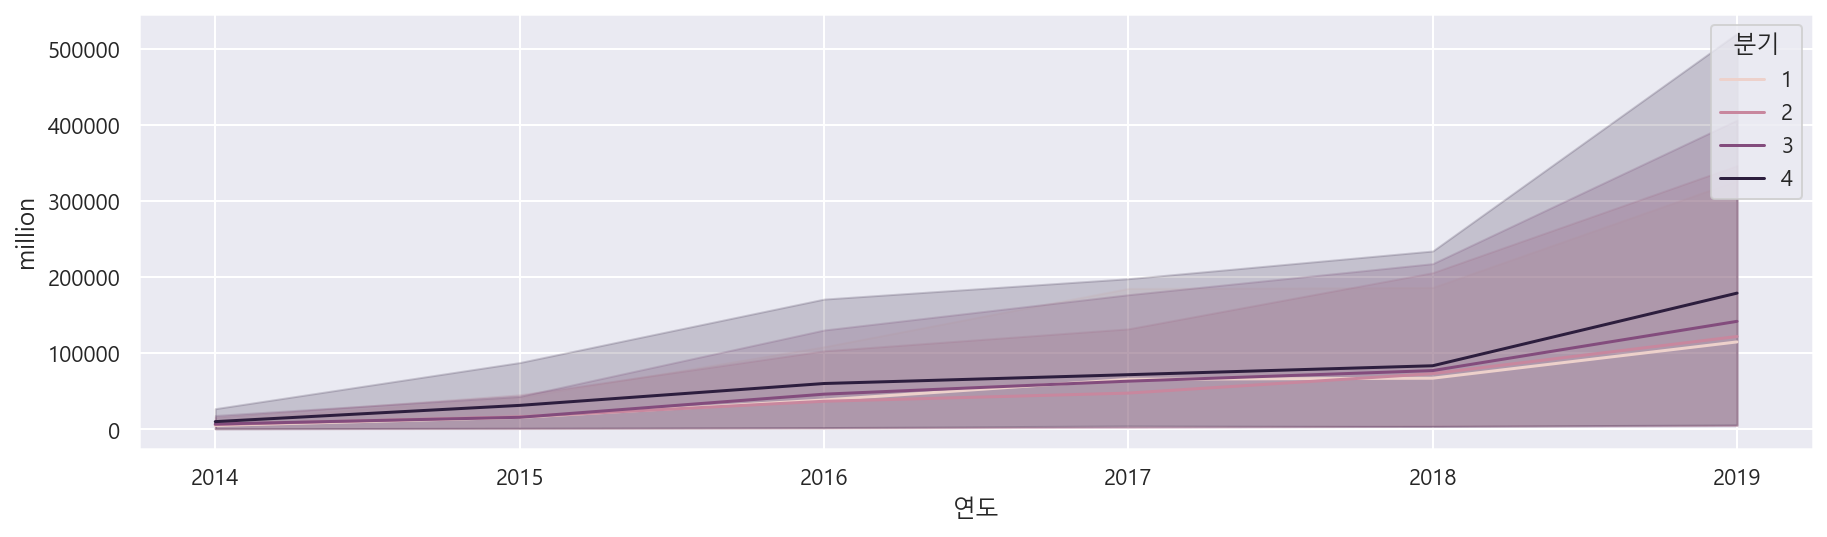

In [25]:
# df_total 의 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[(df_total["상품군별"] == "화장품")].copy()
plt.figure(figsize=(15, 4))  
#line plot으로 그리고 분기별로 다른 색 표시 
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='million'>

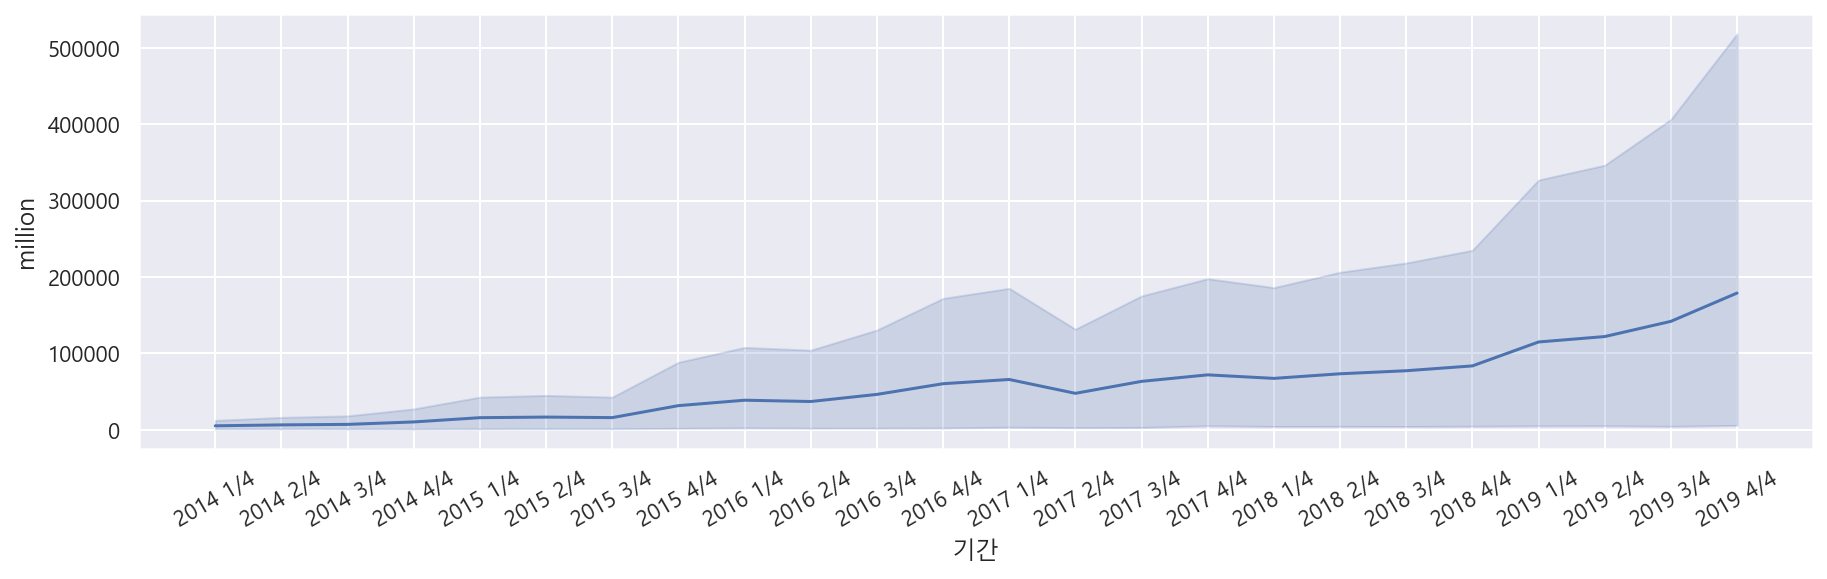

In [26]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

<AxesSubplot:xlabel='기간', ylabel='million'>

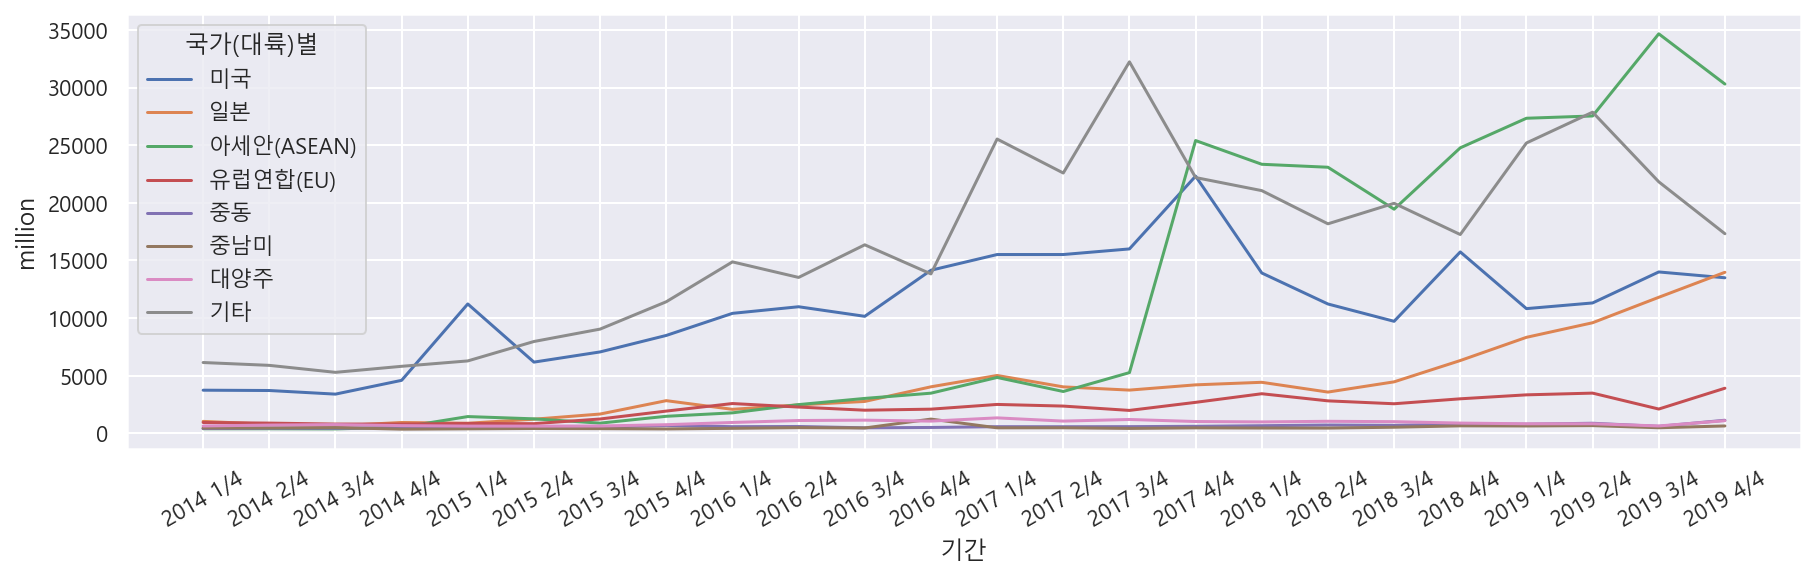

In [30]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 국가별 다른색상 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
#중국이 너무 커서 다른 나라를 볼 수 없어서, 중국 제외
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] !="중국"], x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

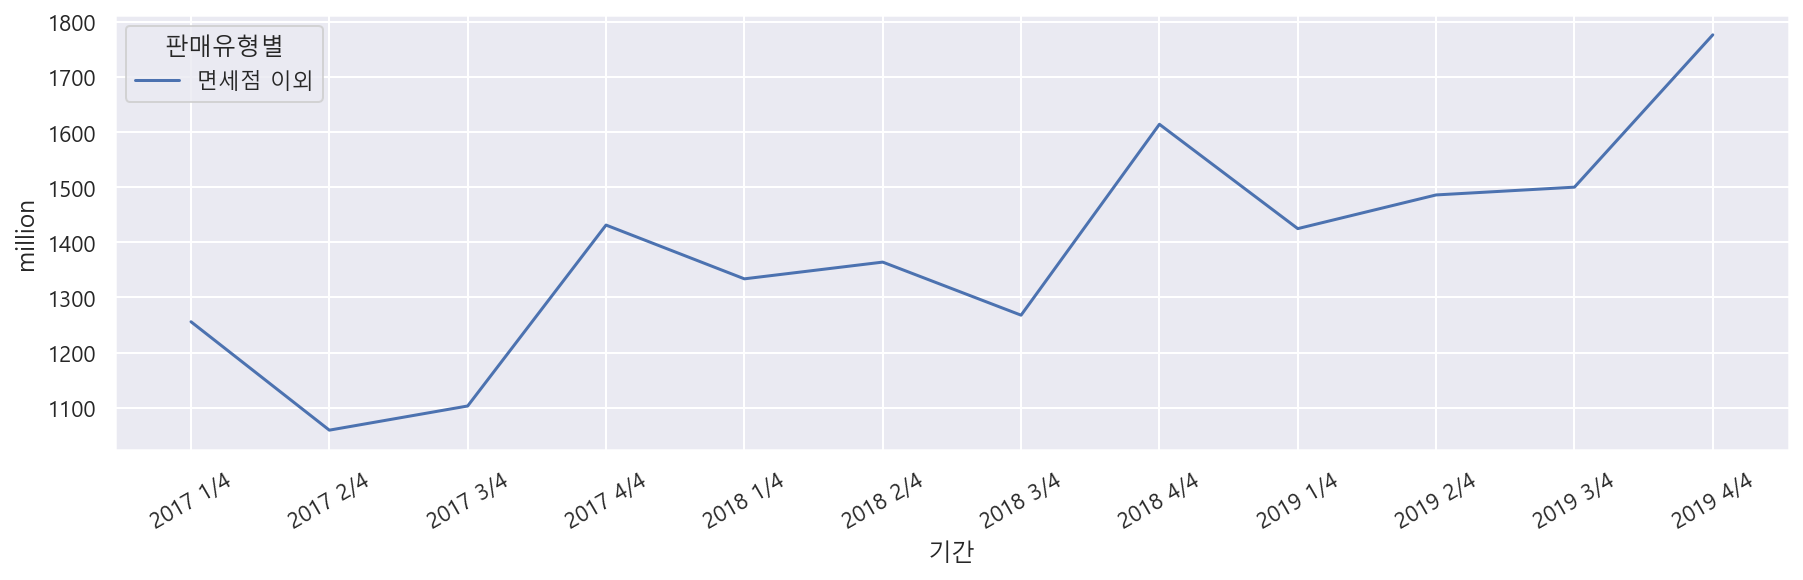

In [35]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별" 다른색상 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"]!="계") & (df["판매유형별"]!="면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="million", hue="판매유형별", ci=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

<AxesSubplot:title={'center':'의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

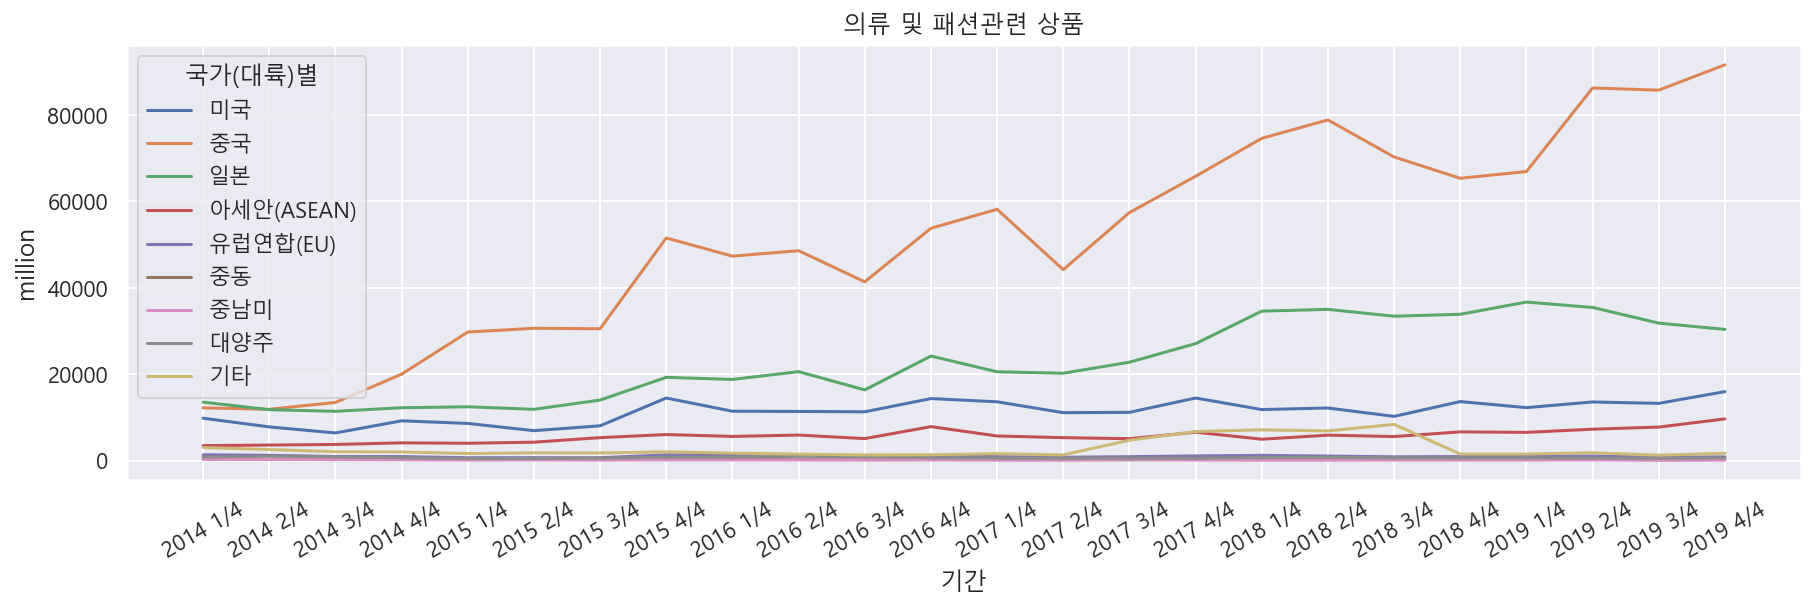

In [36]:
#의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"].str.contains("의류"))& (df["판매유형별"]=="계")].copy()
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
#기간별 금액 데이터 시각화, 대륙별 다른 색상 표시 
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

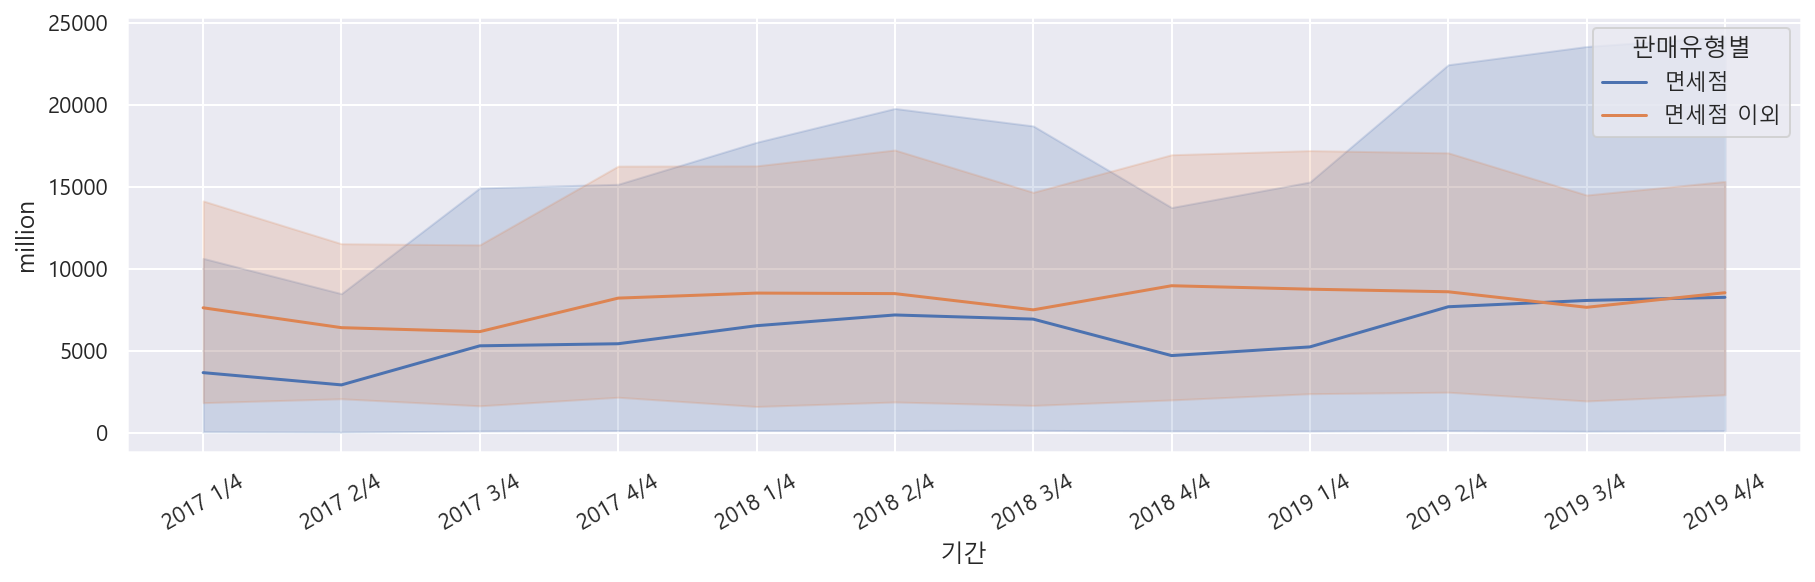

In [38]:
# 의류 관련 상품 판매액에 대한 금액 데이터 시각화
# 판매 유형별 다른 색상
df_fashion2 = df[(df["상품군별"].str.contains("의류"))& (df["판매유형별"]!="계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="million", hue="판매유형별")

### 데이터 집계하기

In [39]:
# 피봇테이블로 대륙별 연도별 합계금액을 표 형태로 구하기
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")# 옵션이 없으면 mean값 을 나타냄

pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

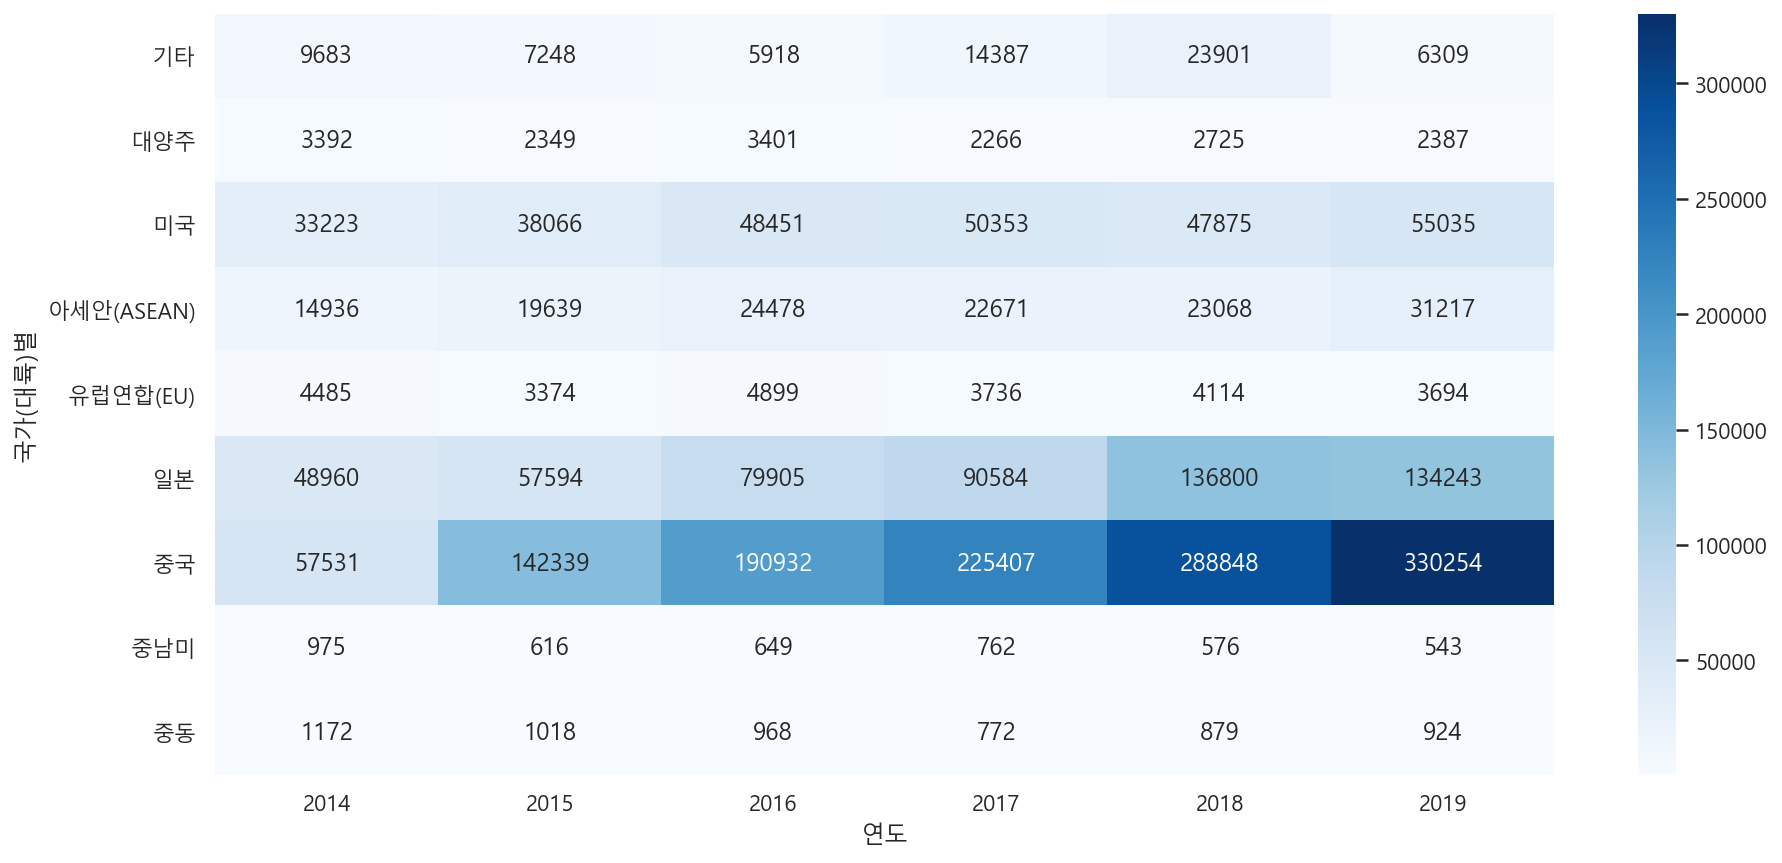

In [40]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현
plt.figure(figsize=(15, 7))
#어두울수록 숫자가 큼
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")#소수점 없애기

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

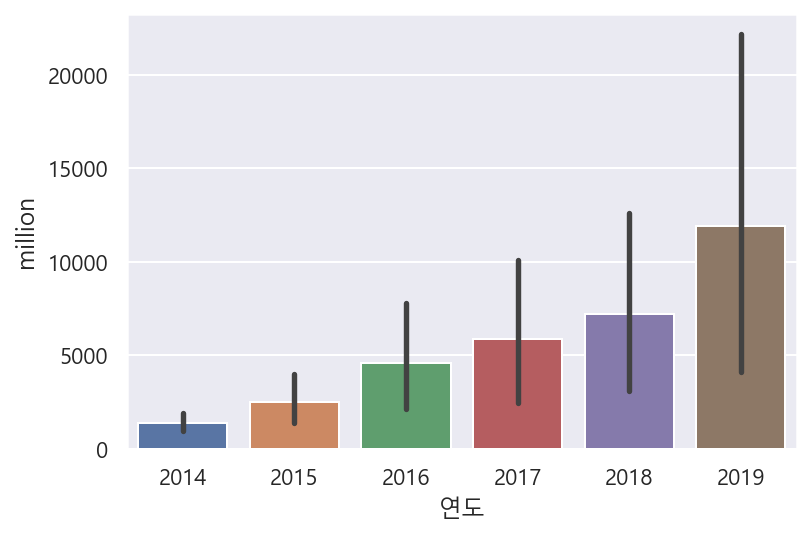

In [41]:
# 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계금액을 시각화
sns.barplot(x="연도", y="million", data=df_total)

<AxesSubplot:xlabel='연도', ylabel='million'>

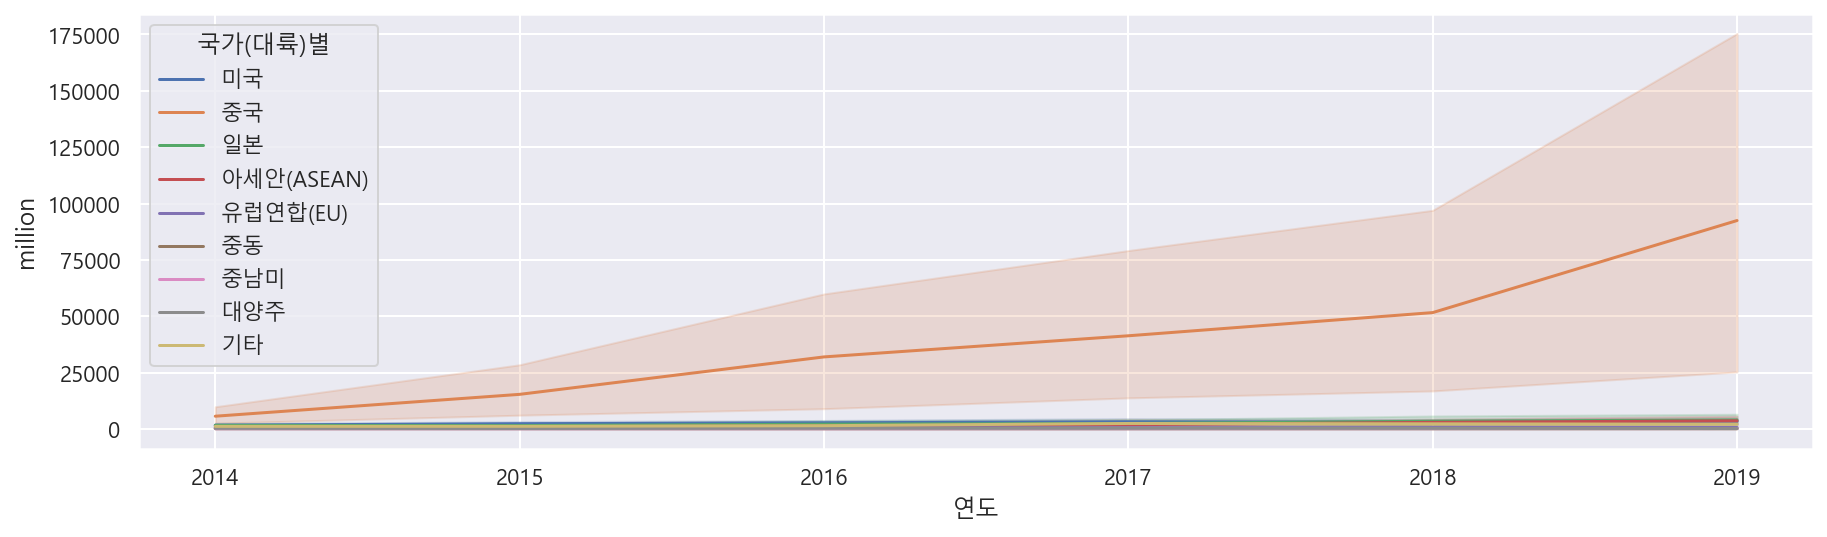

In [43]:
# 연도별 판매액을 그리고, 대륙별로 다른 색상으로 표현
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_total, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

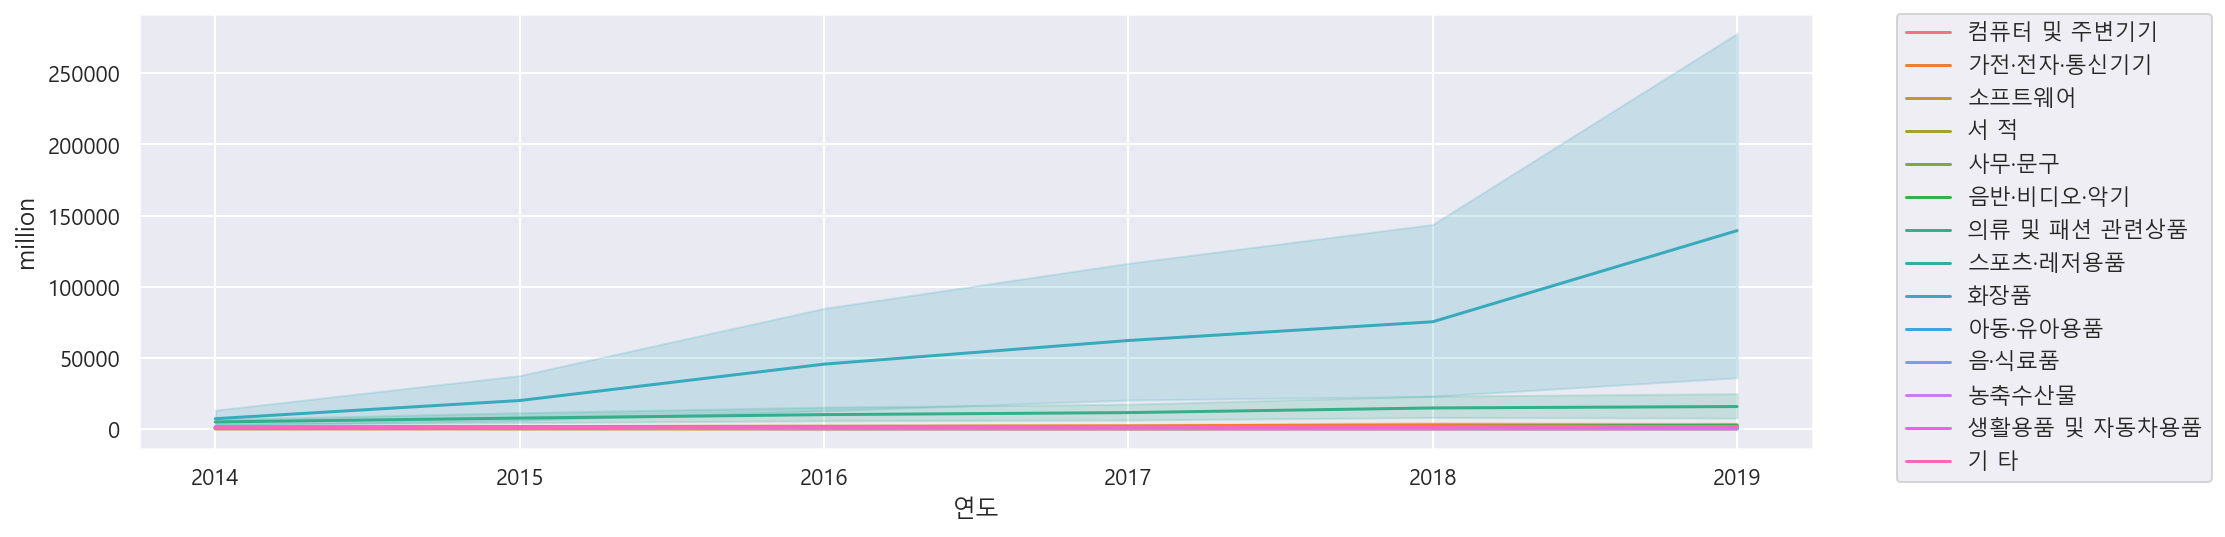

In [45]:
#연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표시
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_total, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)